# Tabular Kaggle Project - Cirrhosis Outcomes 

Guideline for steps for the Kaggle Tabular Project. You will "turn in" a GitHub repository, modeled after [Project Template](https://github.com/UTA-DataScience/ProjectTempate) on the day of the final, May 3rd 1:30 pm. During the final period we will have about 5 minutes to go over your project and your results.

You can find a list of possible Tabular datasets here on [Excel File in Teams](https://mavsuta.sharepoint.com/:x:/r/sites/Course_2242_data_3402_001-vUhPXzAGLgTnk/Shared%20Documents/General/TabularDatasets.xlsx?d=w17e157db75904dfcb03a78c84f10e2e6&csf=1&web=1&e=KHi7m9). You are not limited to these datasets. If you find a Kaggle challenge not listed that you would like to attempt, please go check with Dr. Farbin to make sure it is viable.

This notebook outlines the steps you shoud follow. The file(s) in the GitHub repository should contain these steps. Note that you will be only considering classification projects.

## Define Project

* Provide Project link.
* Short paragraph describing the challenge. 
* Briefly describe the data.

---
---

### **Project Link:** 
https://www.kaggle.com/competitions/playground-series-s3e26/data

### **Challenge:** 
The dataset was created using a deep learning model trained on the Cirrhosis Patient Survival Prediction dataset. The goal is to predict the outcomes of patients with cirrhosis using a multi-class approach. 

### **Data:** 
- Tabular
- Metric being calculated being **logloss**
- Submit predicted probabilities for each of the three possible outcomes: **Status_C, Status_CL, and Status_D**

---
---

## Data Loading and Initial Look

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [1]:
# importing libraries for data loading and understanding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Initial Look for the Training set 

In [2]:
# opening train csv
df_train = pd.read_csv("cirrhosis_train.csv")
df_train.head(10)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
5,5,703,D-penicillamine,19270,F,N,Y,N,N,0.6,227.0,3.46,34.0,6456.2,60.63,68.0,213.0,11.5,3.0,D
6,6,1300,Placebo,17703,F,N,N,N,N,1.0,328.0,3.35,43.0,1677.0,137.95,90.0,291.0,9.8,3.0,C
7,7,1615,Placebo,21281,F,N,Y,N,N,0.6,273.0,3.94,36.0,598.0,52.70,214.0,227.0,9.9,3.0,C
8,8,2050,D-penicillamine,20684,F,N,N,N,N,0.7,360.0,3.65,72.0,3196.0,94.55,154.0,269.0,9.8,2.0,C
9,9,2615,D-penicillamine,15009,F,N,N,N,N,0.9,478.0,3.60,39.0,1758.0,171.00,140.0,234.0,10.6,2.0,C


In [3]:
# how big is the training set
df_train.shape

(7905, 20)

In [4]:
# columns for training set
df_train.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [5]:
# training set info about data types & null counts
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [6]:
# now checking for duplicate rows
dupe_train = df_train.duplicated().sum()
print(f"Duplicate rows: {dupe_train}")

Duplicate rows: 0


In [7]:
# checking for missing values in columns
df_train_mv = df_train.isnull().sum()
print(f"Missing Values: {df_train_mv}")

Missing Values: id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64


### **Basic Stat Summaries of Training Set**

In [8]:
# basic stat descriptions training set
print(df_train.describe(include='all'))

                 id       N_Days     Drug           Age   Sex Ascites  \
count   7905.000000  7905.000000     7905   7905.000000  7905    7905   
unique          NaN          NaN        2           NaN     2       2   
top             NaN          NaN  Placebo           NaN     F       N   
freq            NaN          NaN     4010           NaN  7336    7525   
mean    3952.000000  2030.173308      NaN  18373.146490   NaN     NaN   
std     2282.121272  1094.233744      NaN   3679.958739   NaN     NaN   
min        0.000000    41.000000      NaN   9598.000000   NaN     NaN   
25%     1976.000000  1230.000000      NaN  15574.000000   NaN     NaN   
50%     3952.000000  1831.000000      NaN  18713.000000   NaN     NaN   
75%     5928.000000  2689.000000      NaN  20684.000000   NaN     NaN   
max     7904.000000  4795.000000      NaN  28650.000000   NaN     NaN   

       Hepatomegaly Spiders Edema    Bilirubin  Cholesterol      Albumin  \
count          7905    7905  7905  7905.000000 

### Looking at Distrbutions at Numerical Columns

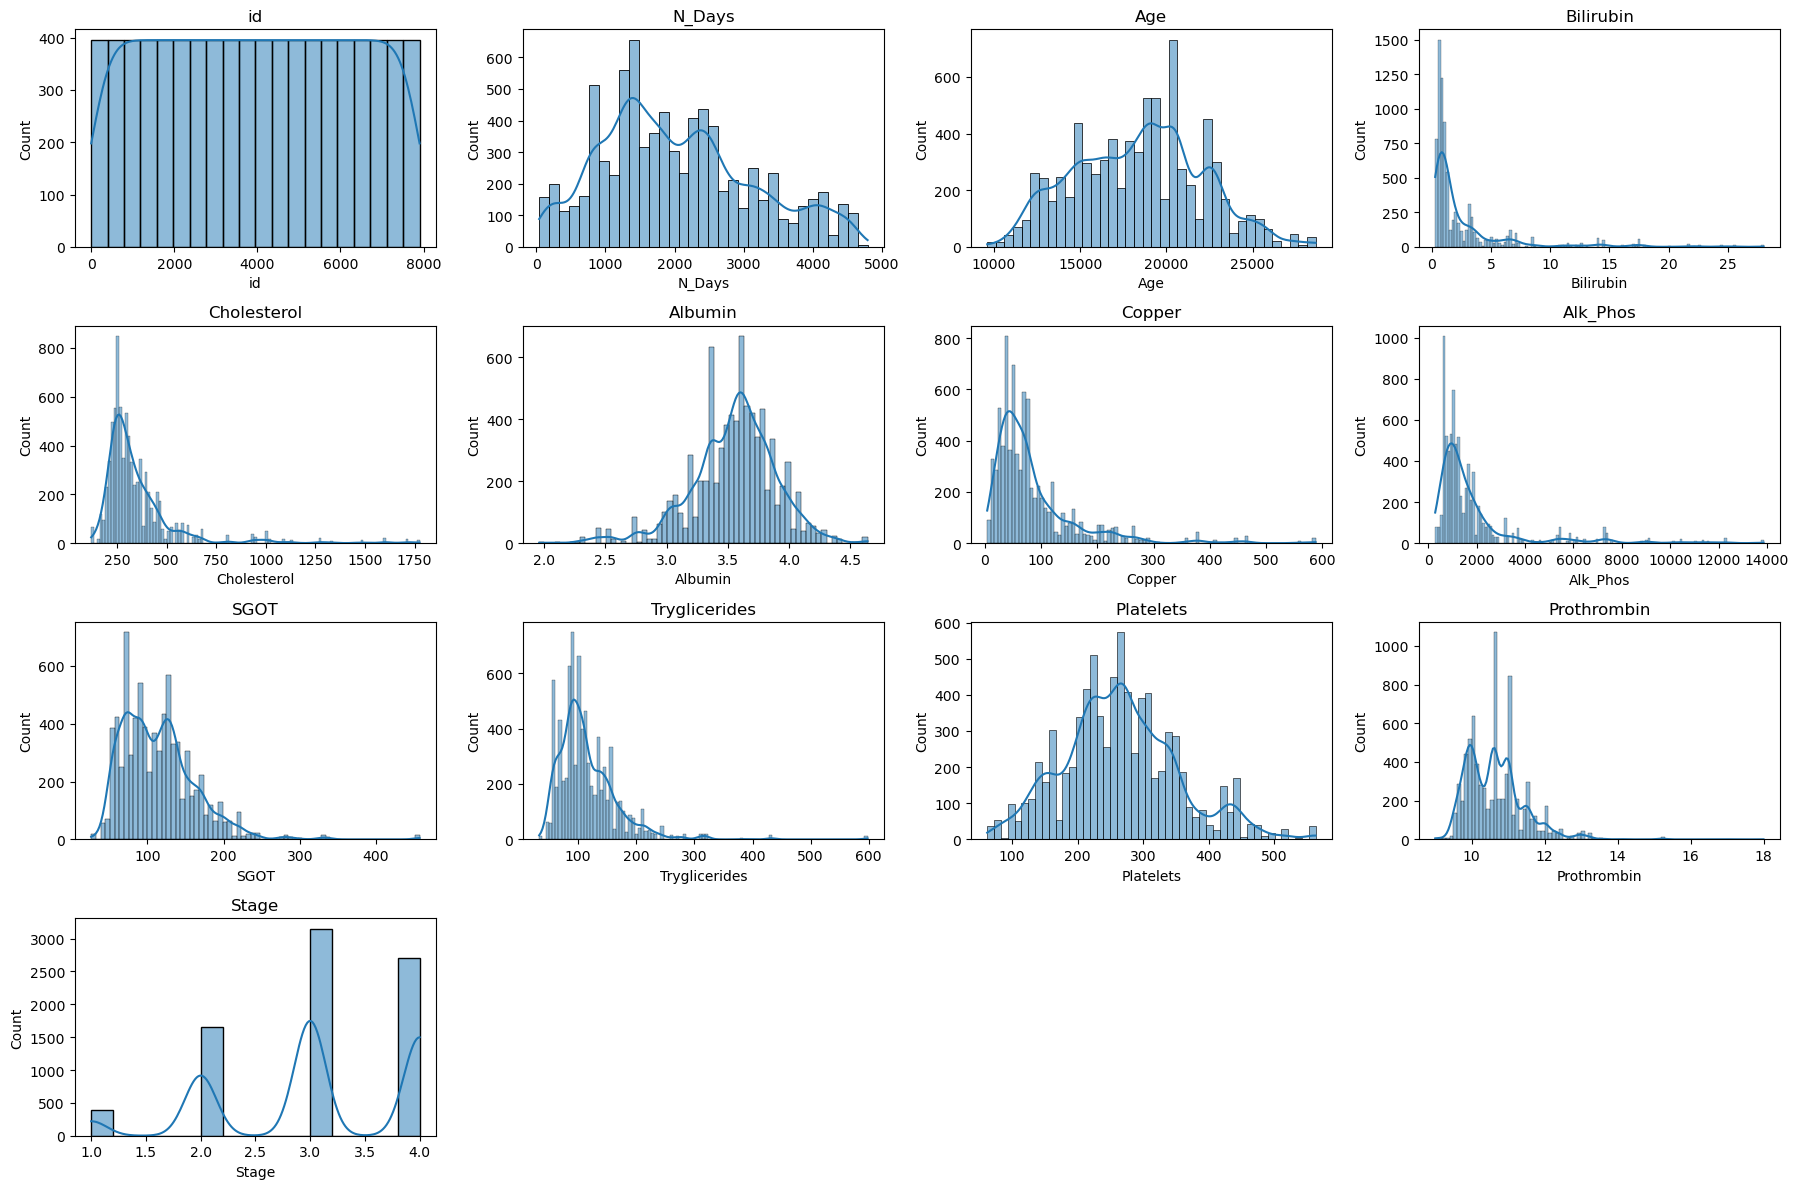

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
axes = axes.flatten()

# plot each column in a subplot
for i, col in enumerate(df_train.select_dtypes(include=['float64', 'int64']).columns):
    if i < 16:
        sns.histplot(df_train[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col}')
    else:
        break

# remove empty subplots
for j in range(i + 1, 16):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

In [10]:
# looking at skewness
numerical_df = df_train.select_dtypes(include=['float64', 'int64'])
print("Skewness:\n", numerical_df.skew())

Skewness:
 id               0.000000
N_Days           0.448660
Age              0.084091
Bilirubin        3.339695
Cholesterol      3.679658
Albumin         -0.561150
Copper           2.701736
Alk_Phos         3.195558
SGOT             1.534806
Tryglicerides    2.633921
Platelets        0.420048
Prothrombin      1.292436
Stage           -0.525973
dtype: float64


### From this we can tell that :
#### - Right Skew 

#### Age is not in years but in days 

### Status
- C = alive at N_Days
- D = deceased after N_Days
- CL = alive after N_Days due to transplant

### Finding Outliers 

- Excluding categorical columns

In [11]:
exclude = [ 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug', 'Status']

# will be using IQR to look for outliers since not all have a normal distribution
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

Outliers in id: 0


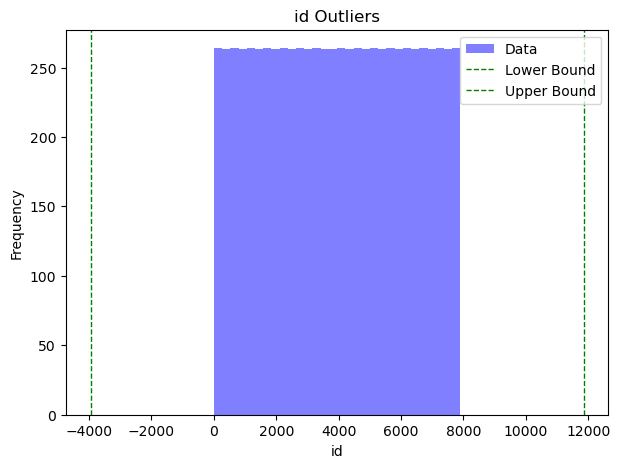

Outliers in N_Days: 0


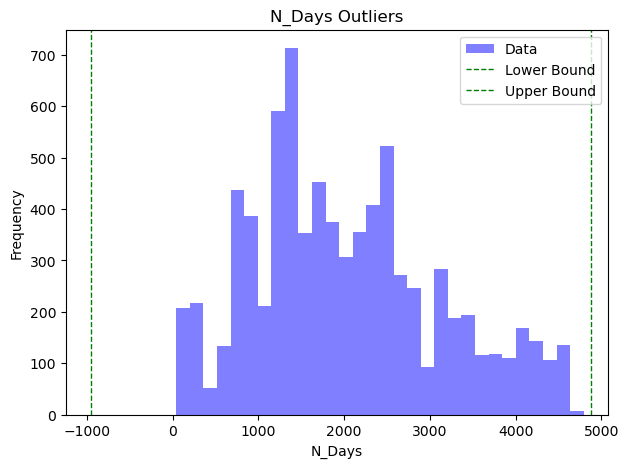

Outliers in Age: 36


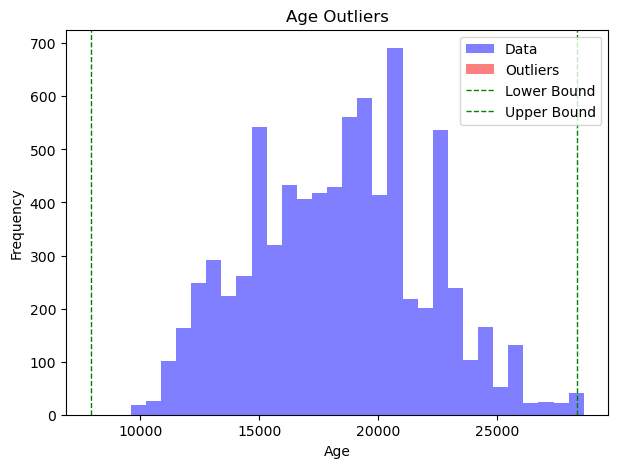

Outliers in Bilirubin: 789


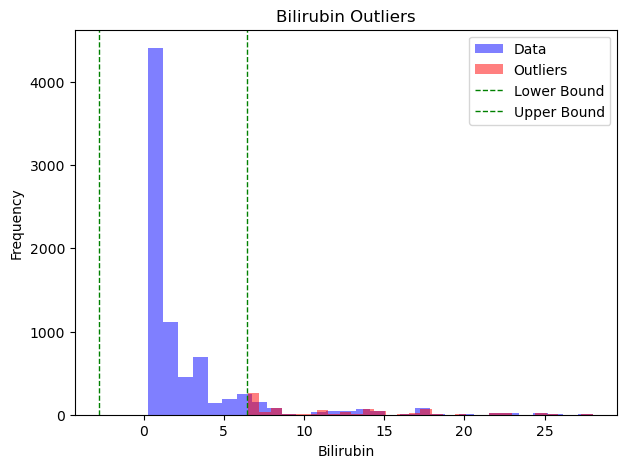

Outliers in Cholesterol: 502


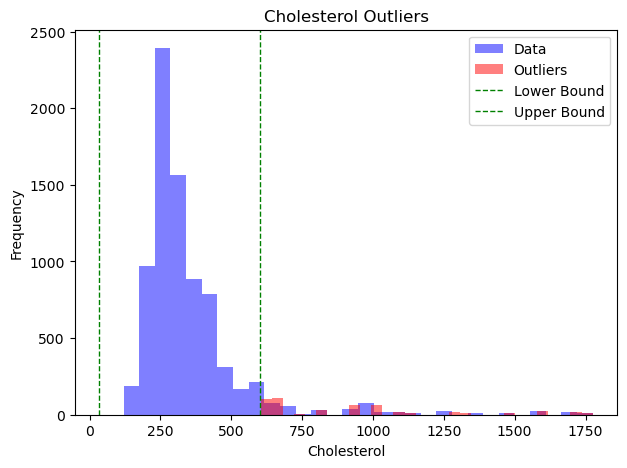

Outliers in Albumin: 178


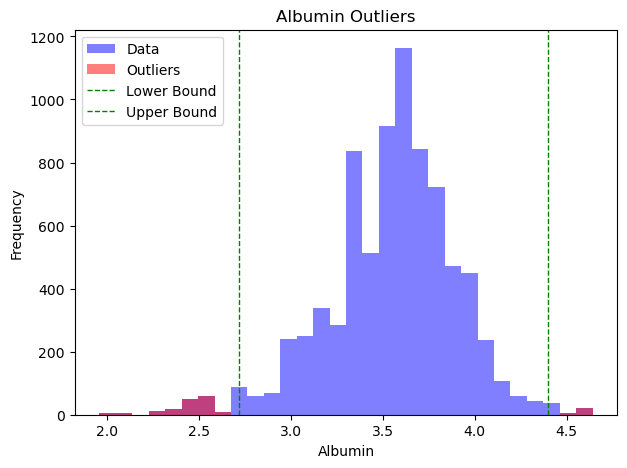

Outliers in Copper: 655


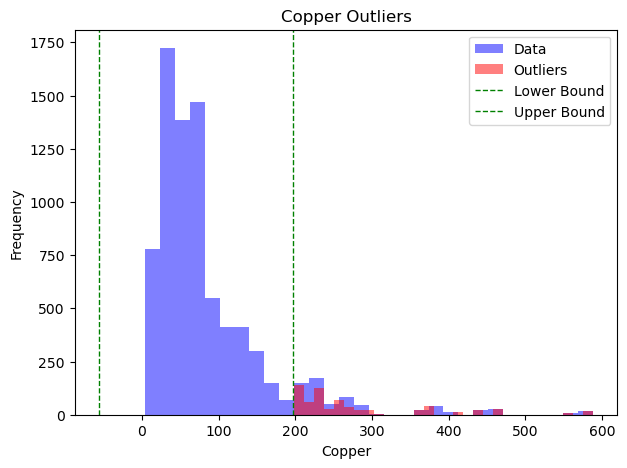

Outliers in Alk_Phos: 792


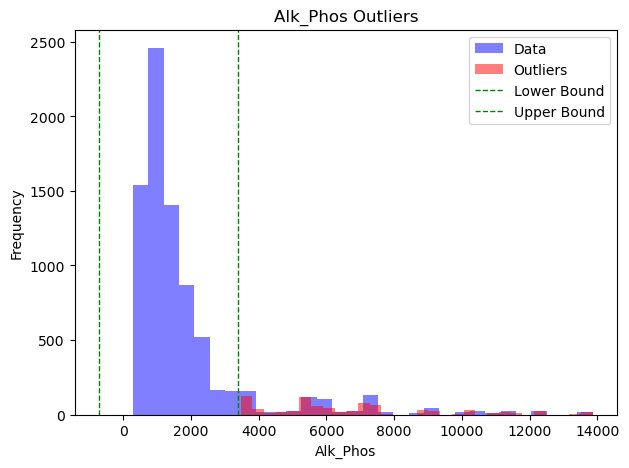

Outliers in SGOT: 146


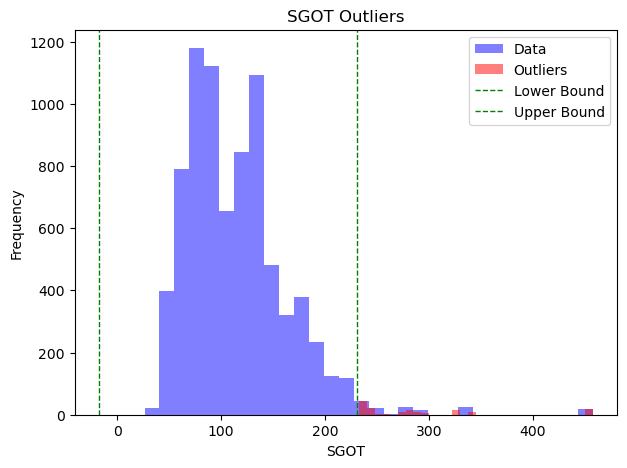

Outliers in Tryglicerides: 267


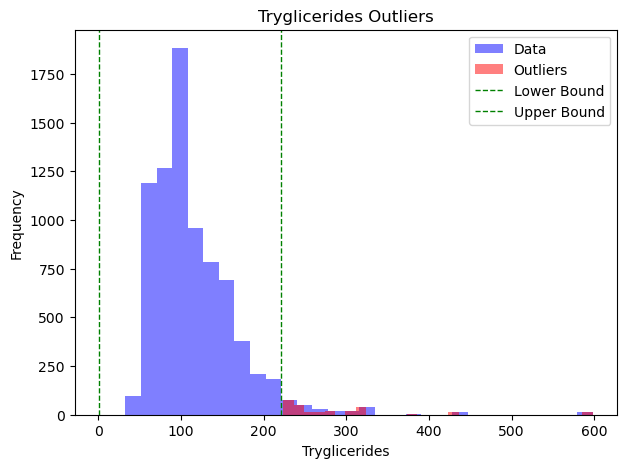

Outliers in Platelets: 114


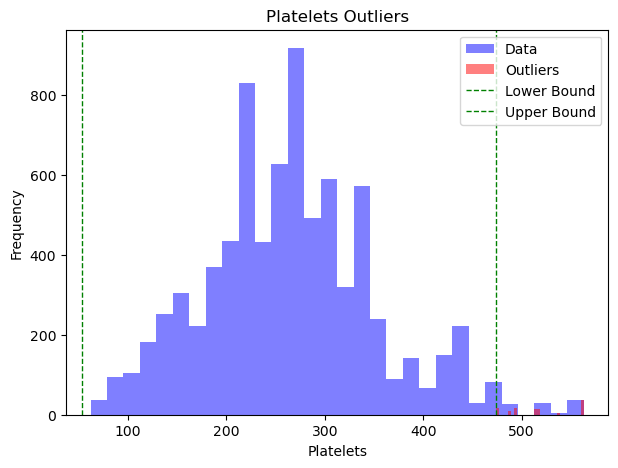

Outliers in Prothrombin: 173


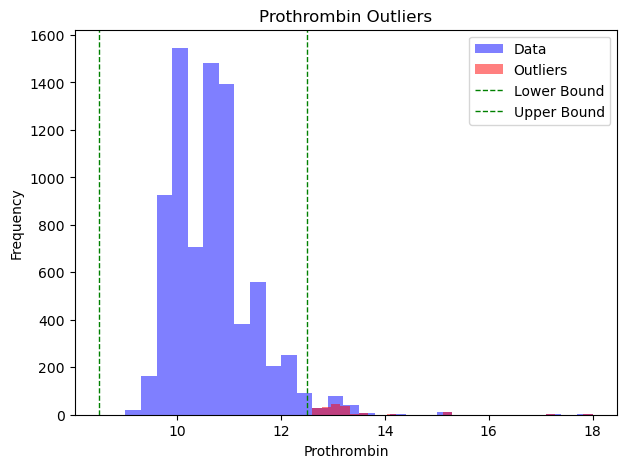

Outliers in Stage: 0


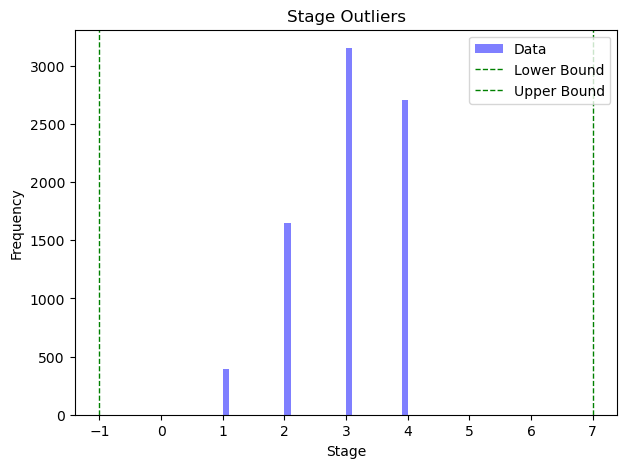

In [12]:
# loop through columns to find outliers
for column in df_train.columns:
    if column not in exclude:
        outliers, lower_bound, upper_bound = find_outliers(df_train[column])
        outlier_count = len(outliers)
        print(f"Outliers in {column}: {outlier_count}")


        # histogram to plot
        plt.figure(figsize=(7, 5))
        plt.hist(df_train[column].dropna(), bins=30, alpha=0.5, color='blue', label='Data') # dropping missing values for this plot

        # highlight the outliers on the histogram
        if not outliers.empty:
            plt.hist(outliers, bins=30, alpha=0.5, color='red', label='Outliers')

        plt.axvline(x=lower_bound, color='green', linestyle='dashed', linewidth=1, label='Lower Bound')
        plt.axvline(x=upper_bound, color='green', linestyle='dashed', linewidth=1, label='Upper Bound')
        plt.title(f"{column} Outliers")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

---
---

### Quick Initial Look at the Test Set 

In [13]:
# test csv 
df_test = pd.read_csv("cirrhosis_test.csv")
df_test.head(10)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
5,7910,1433,D-penicillamine,20510,F,N,N,N,N,0.8,198.0,3.94,38.0,911.0,57.35,56.0,280.0,9.8,1.0
6,7911,1785,Placebo,19060,F,N,N,N,N,0.4,273.0,3.65,25.0,671.0,84.00,177.0,284.0,9.9,3.0
7,7912,1925,D-penicillamine,19994,F,N,Y,N,S,1.8,244.0,3.26,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
8,7913,41,D-penicillamine,24064,F,Y,Y,N,N,17.9,178.0,2.10,220.0,705.0,338.00,229.0,62.0,12.9,4.0
9,7914,1765,D-penicillamine,28650,M,N,Y,N,S,6.4,243.0,3.35,380.0,983.0,158.10,154.0,97.0,11.2,2.0


In [14]:
# how big is the test set 
df_test.shape

(5271, 19)

In [15]:
# columns for test set
df_test.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [16]:
dupe_test = df_test.duplicated().sum()
print(f"Duplicate rows: {dupe_test}")

Duplicate rows: 0


In [17]:
df_test_mv = df_test.isnull().sum()
print(f"Missing Values: {df_test_mv}")

Missing Values: id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


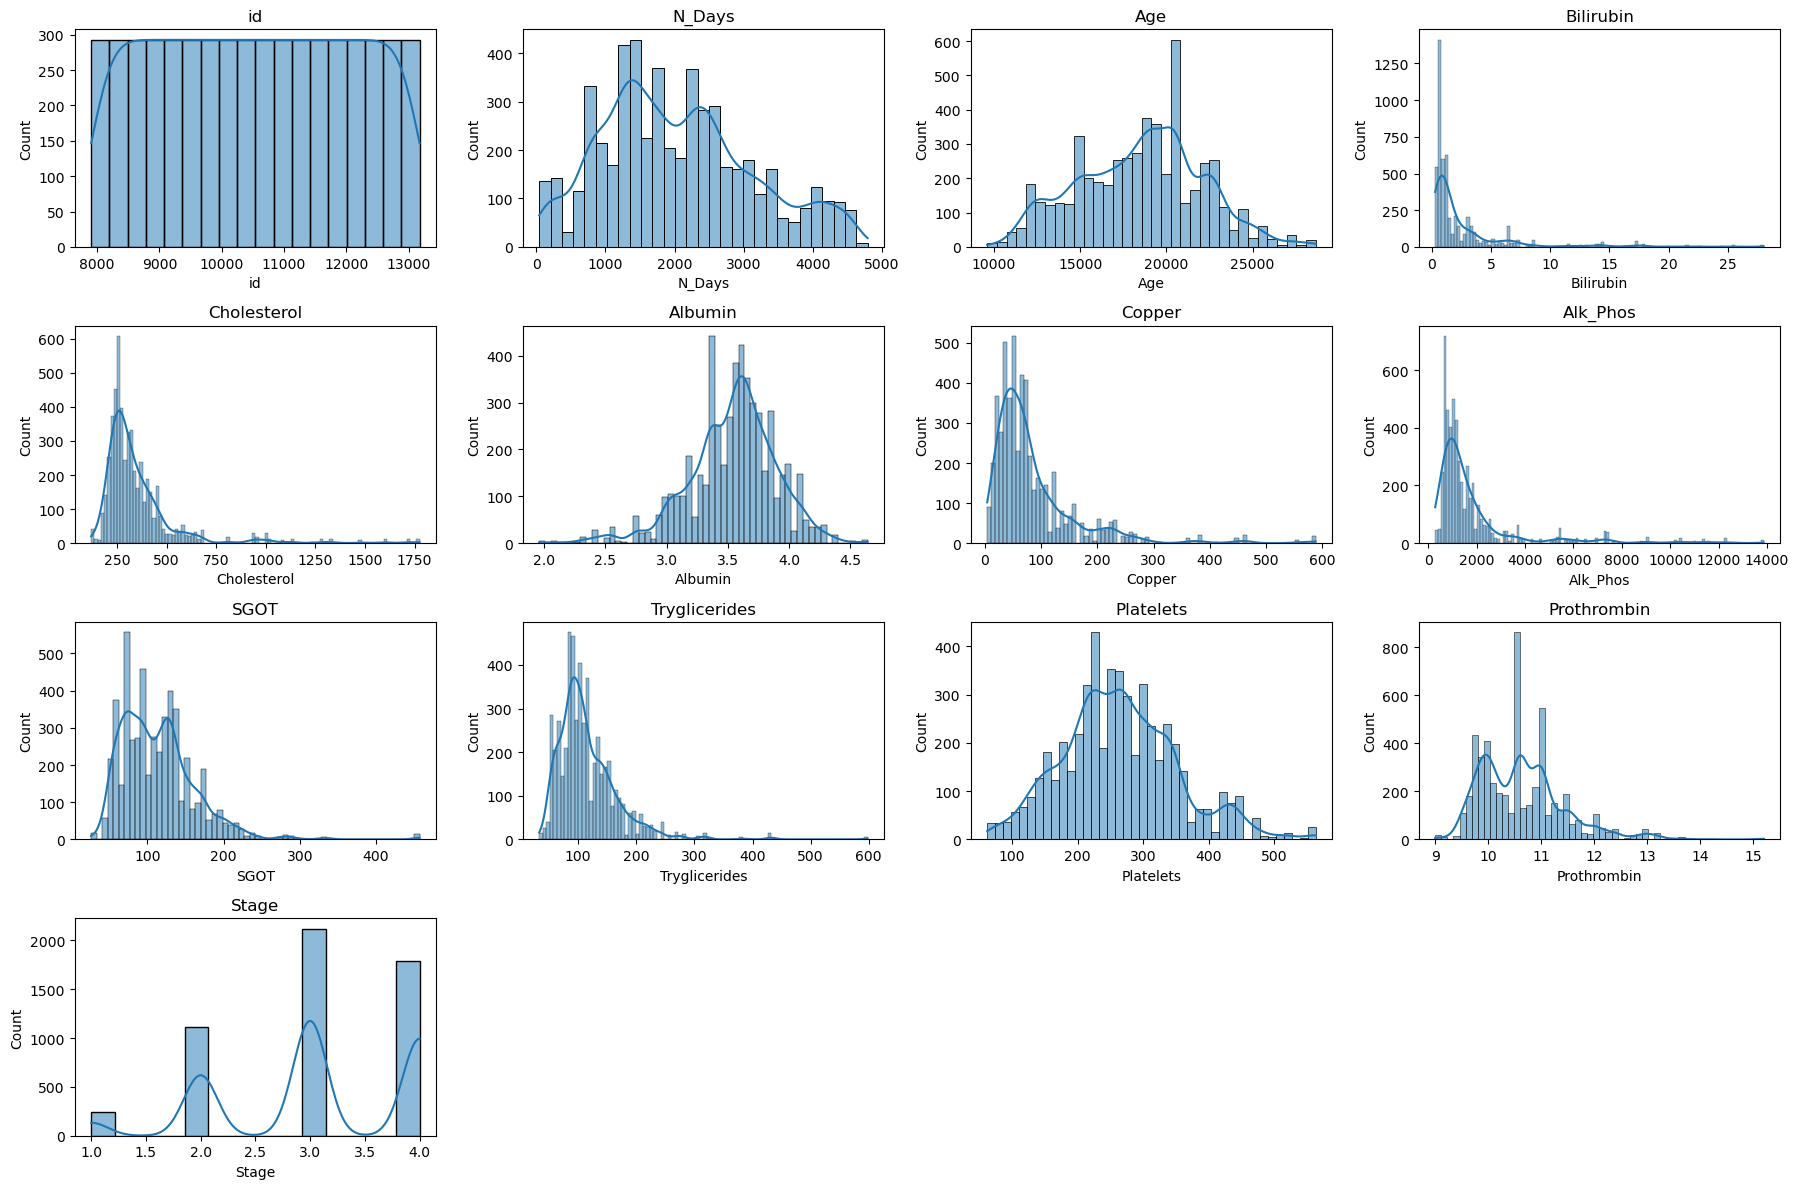

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
axes = axes.flatten()

# plot each column in a subplot
for i, col in enumerate(df_test.select_dtypes(include=['float64', 'int64']).columns):
    if i < 16:
        sns.histplot(df_test[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col}')
    else:
        break

# remove empty subplots
for j in range(i + 1, 16):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

In [19]:
# looking at skewness
numerical_df = df_test.select_dtypes(include=['float64', 'int64'])
print("Skewness:\n", numerical_df.skew())

Skewness:
 id               0.000000
N_Days           0.429789
Age             -0.019643
Bilirubin        3.424573
Cholesterol      3.668684
Albumin         -0.578913
Copper           2.861722
Alk_Phos         3.218707
SGOT             1.671033
Tryglicerides    2.445071
Platelets        0.425411
Prothrombin      1.120987
Stage           -0.506534
dtype: float64


Outliers in id: 0


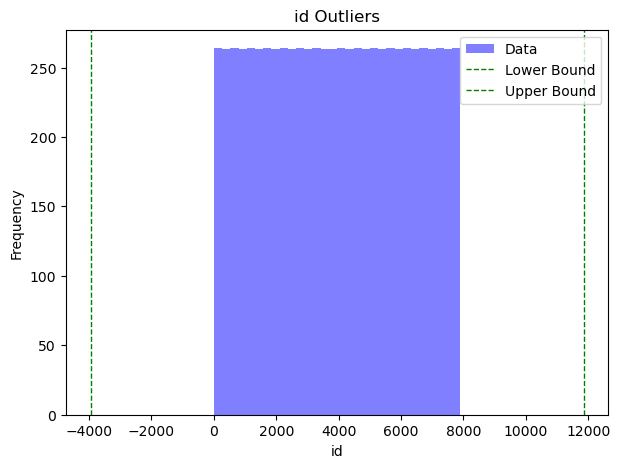

Outliers in N_Days: 0


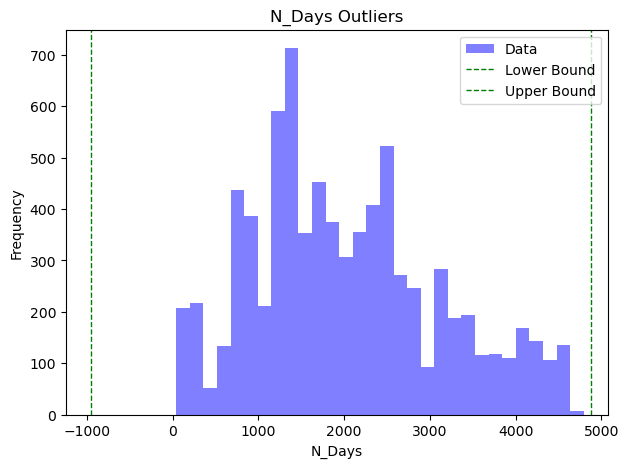

Outliers in Age: 36


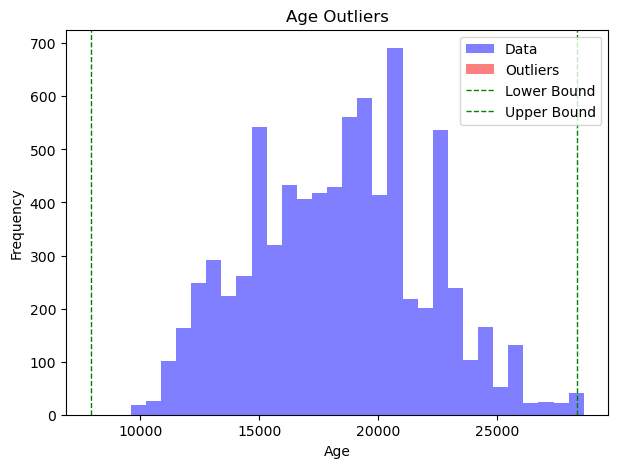

Outliers in Bilirubin: 789


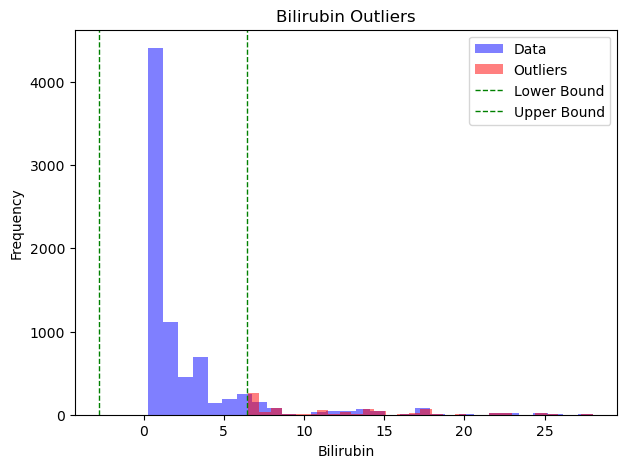

Outliers in Cholesterol: 502


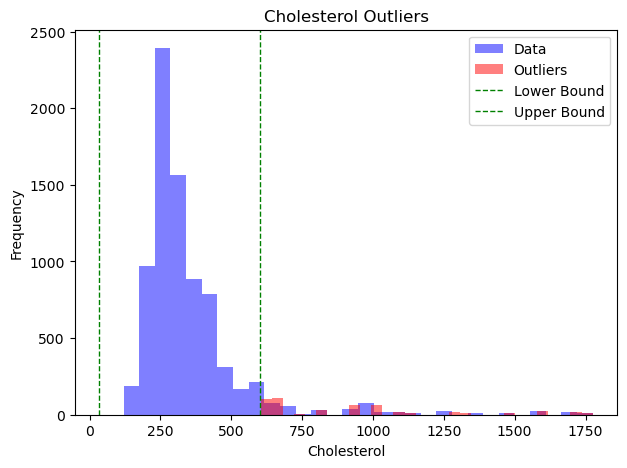

Outliers in Albumin: 178


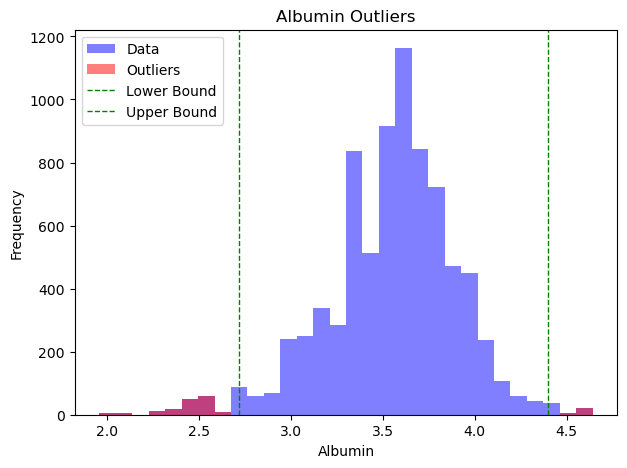

Outliers in Copper: 655


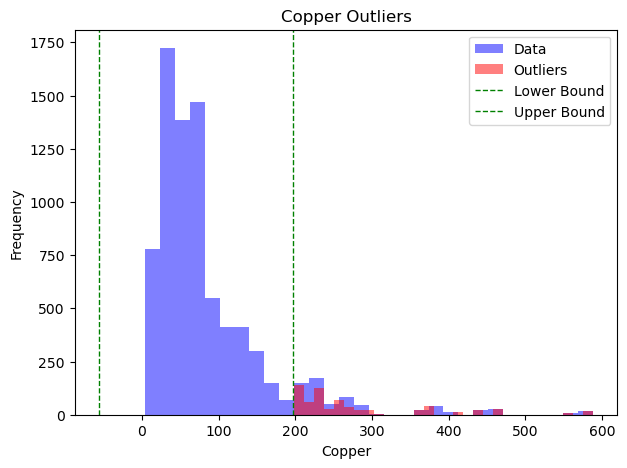

Outliers in Alk_Phos: 792


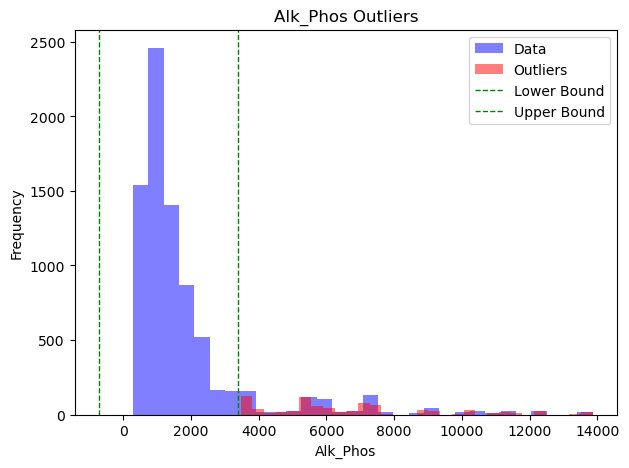

Outliers in SGOT: 146


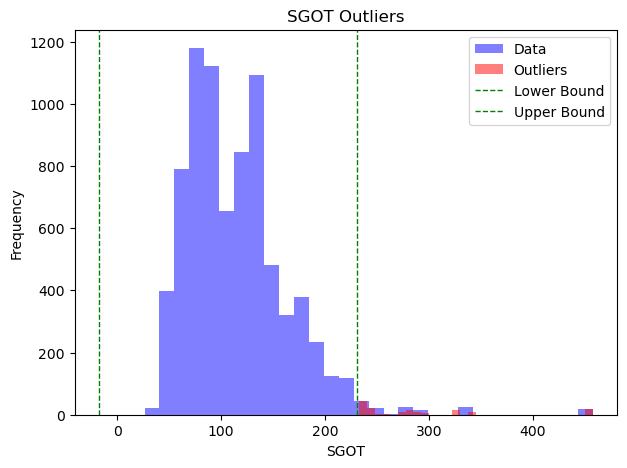

Outliers in Tryglicerides: 267


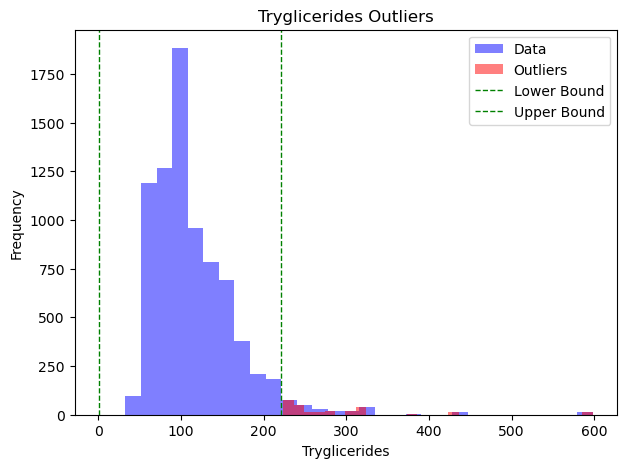

Outliers in Platelets: 114


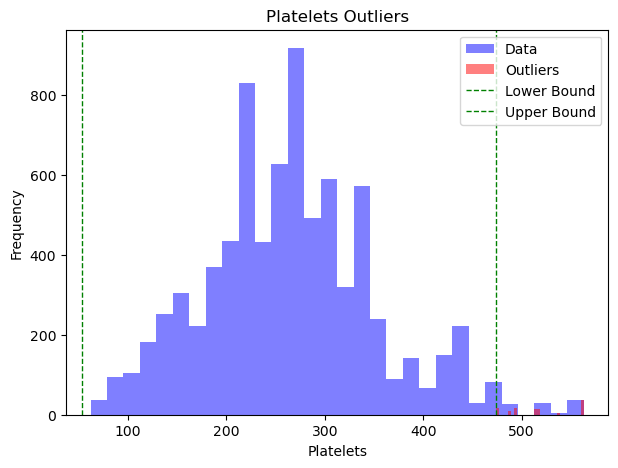

Outliers in Prothrombin: 173


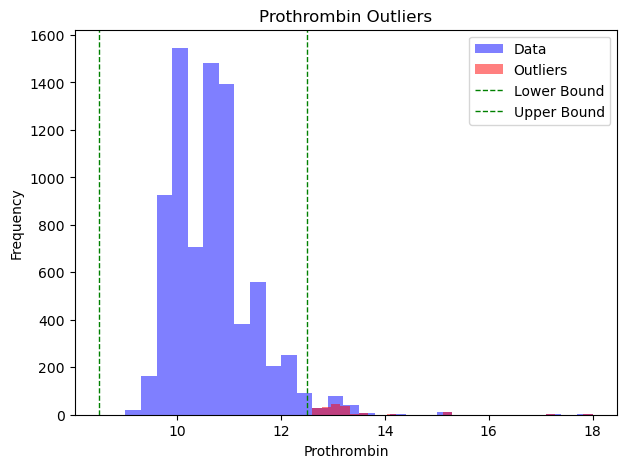

Outliers in Stage: 0


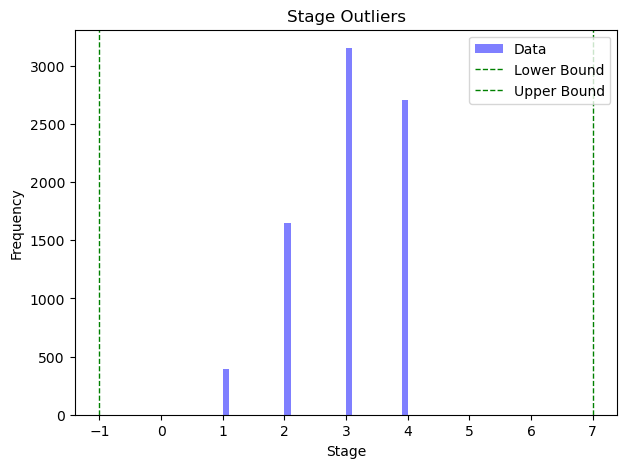

In [20]:
# loop through columns to find outliers
for column in df_test.columns:
    if column not in exclude:
        outliers, lower_bound, upper_bound = find_outliers(df_train[column])
        outlier_count = len(outliers)
        print(f"Outliers in {column}: {outlier_count}")


        # histogram to plot
        plt.figure(figsize=(7, 5))
        plt.hist(df_train[column].dropna(), bins=30, alpha=0.5, color='blue', label='Data') # dropping missing values for this plot

        # highlight the outliers on the histogram
        if not outliers.empty:
            plt.hist(outliers, bins=30, alpha=0.5, color='red', label='Outliers')

        plt.axvline(x=lower_bound, color='green', linestyle='dashed', linewidth=1, label='Lower Bound')
        plt.axvline(x=upper_bound, color='green', linestyle='dashed', linewidth=1, label='Upper Bound')
        plt.title(f"{column} Outliers")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

---
---

## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

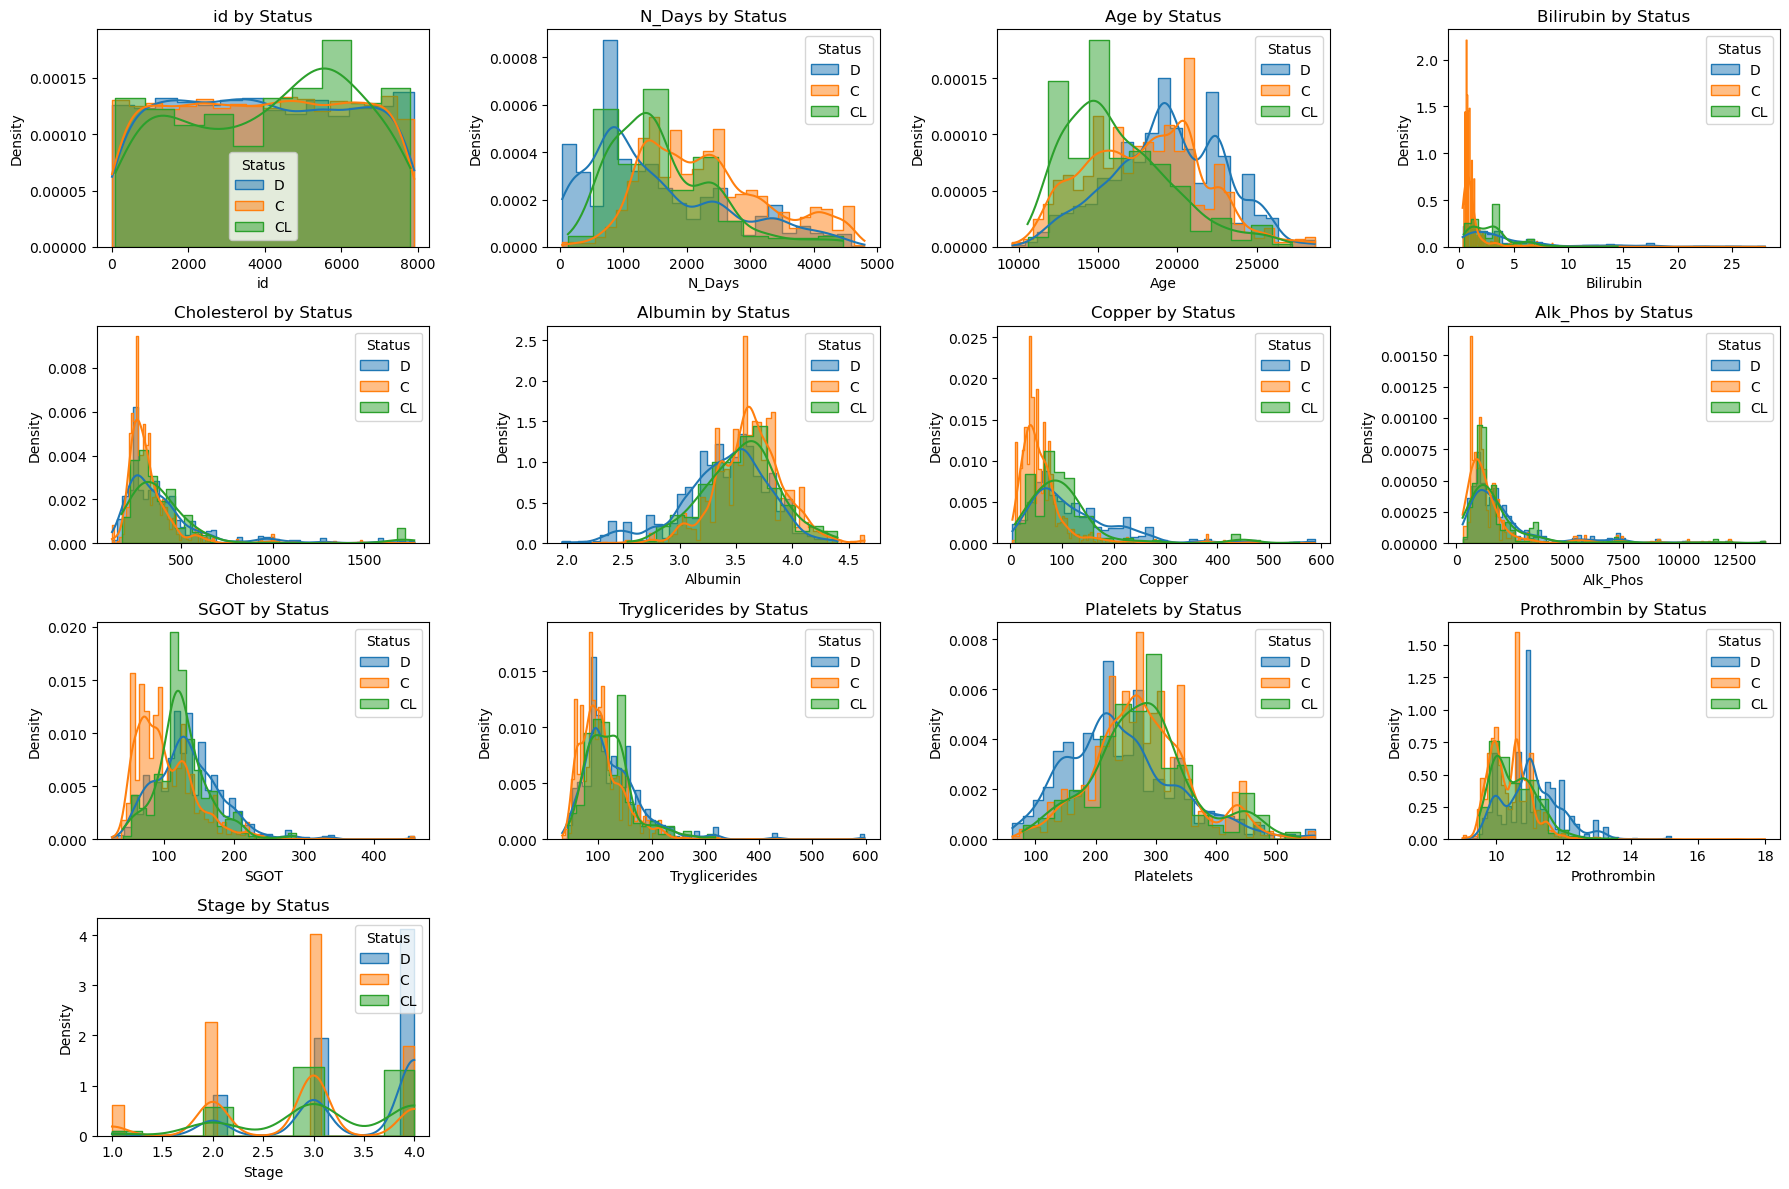

In [21]:
# histograms
# layout of the subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
axes = axes.flatten()

# numerical columns
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# plot ea. numerical col in a subplot by 'Status'
for i, col in enumerate(numerical_columns):
    if i < 16:  
        for class_name in df_train['Status'].unique():
            subset = df_train[df_train['Status'] == class_name]
            sns.histplot(subset[col].dropna(), kde=True, ax=axes[i], label=str(class_name), element='step', stat='density')
        axes[i].set_title(f'{col} by Status')
        axes[i].legend(title='Status')
    else:
        break

# remove any empty subplots if there are fewer
for j in range(i + 1, 16):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

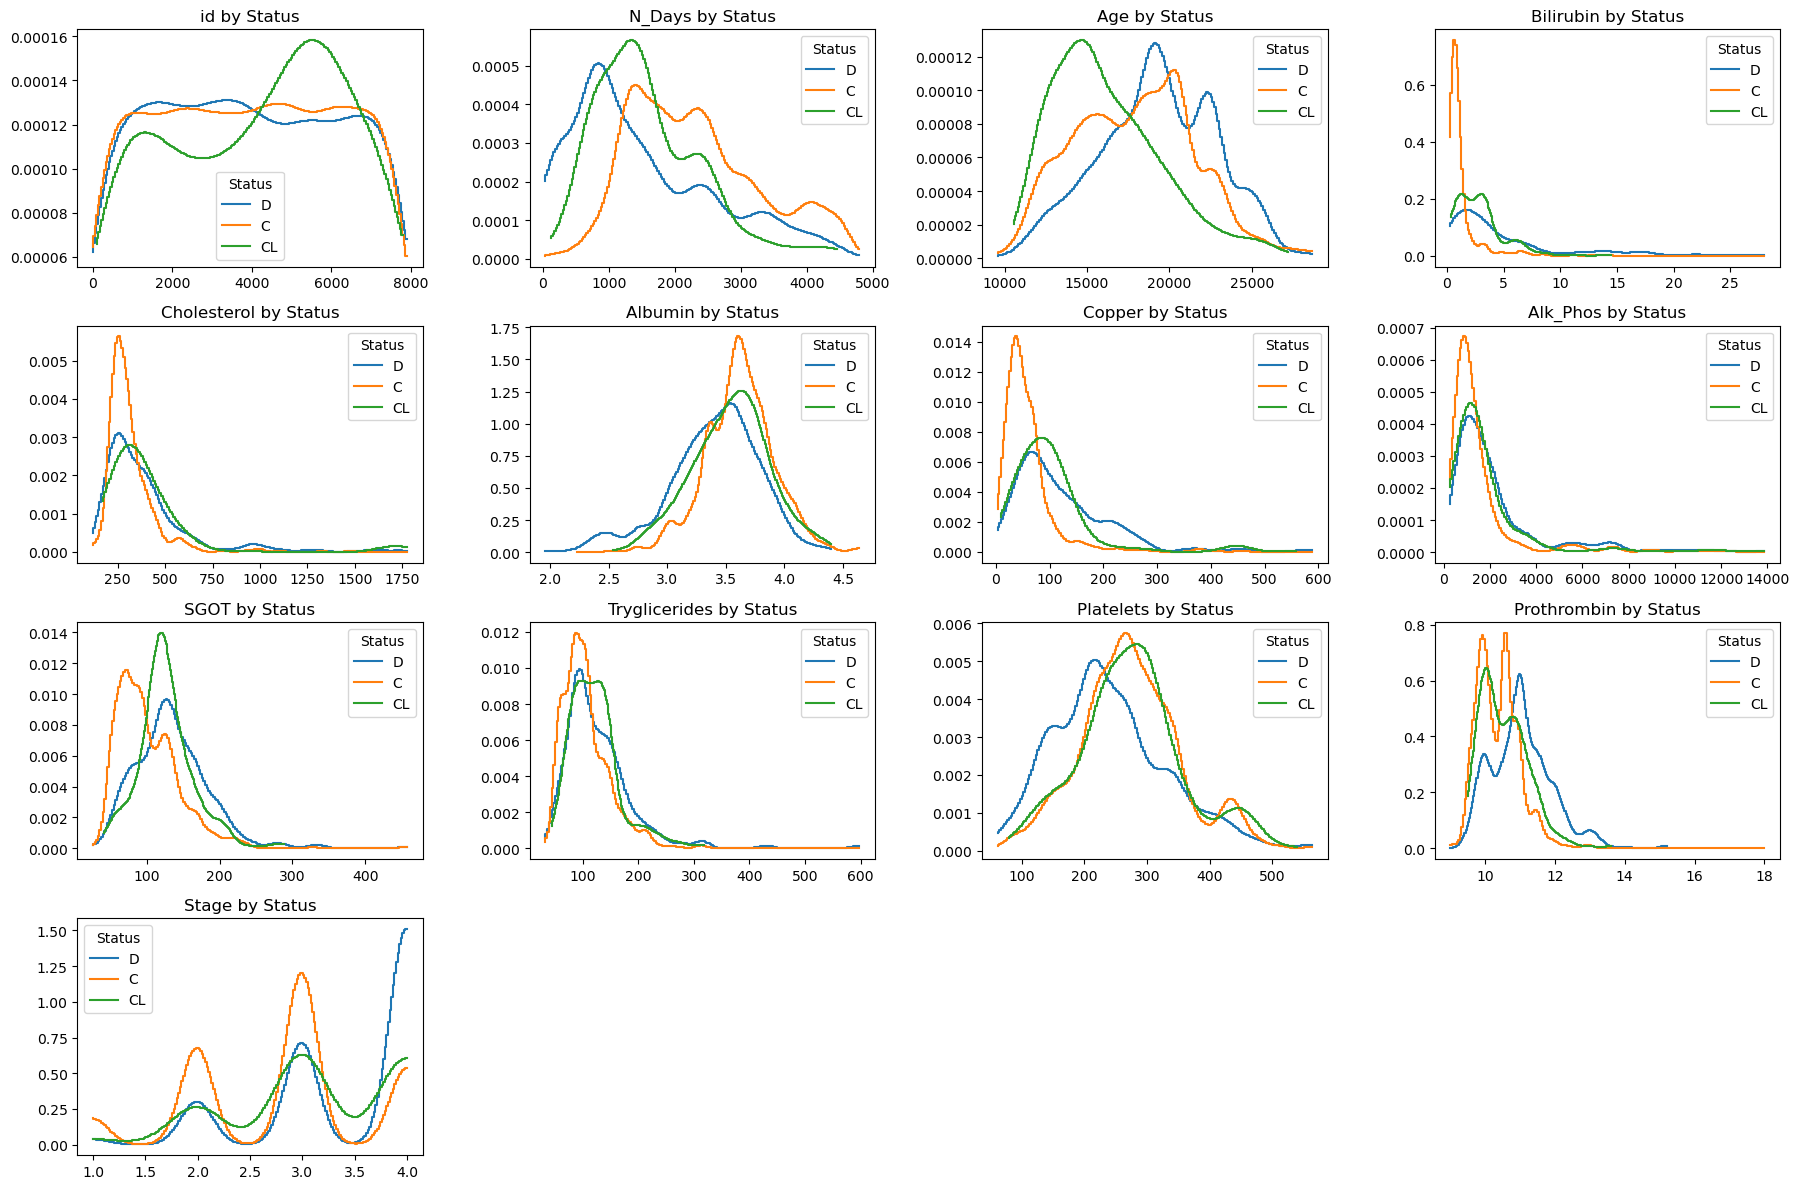

In [22]:
# redo not using seaborn 

# picking kde to better visualize the classes 
from scipy.stats import gaussian_kde

# subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
axes = axes.flatten()

# numerical cols
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# go through over num cols
for i, col in enumerate(numerical_columns):
    if i < 16:
        classes = df_train['Status'].unique()
        for class_name in classes:
            subset = df_train[df_train['Status'] == class_name][col].dropna()
            density = gaussian_kde(subset)
            xs = np.linspace(subset.min(), subset.max(), 200)
            axes[i].plot(xs, density(xs), label=str(class_name), drawstyle='steps')
        axes[i].set_title(f'{col} by Status')
        axes[i].legend(title='Status')
    else:
        break

# deal w/ empty subplots
for j in range(i + 1, 16):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Notes: 

Remember to identify key risk factors leading to worse outcomes, so predictive modeling will help.

Possible algorithms to use: 
- Decision Trees
- XGBoost
- Random Forest
- Logistic Regression

For evaluation : 
- metrics - logloss, accuracy, precision, recall, F1-score

---
---

## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

**Things to consider:**
- There are no missing values
- No duplicate rows 
- Age is in days not years
    - transform it to years
- Some numerical columns have a right skew
    - perform log transformation to have a better scale 

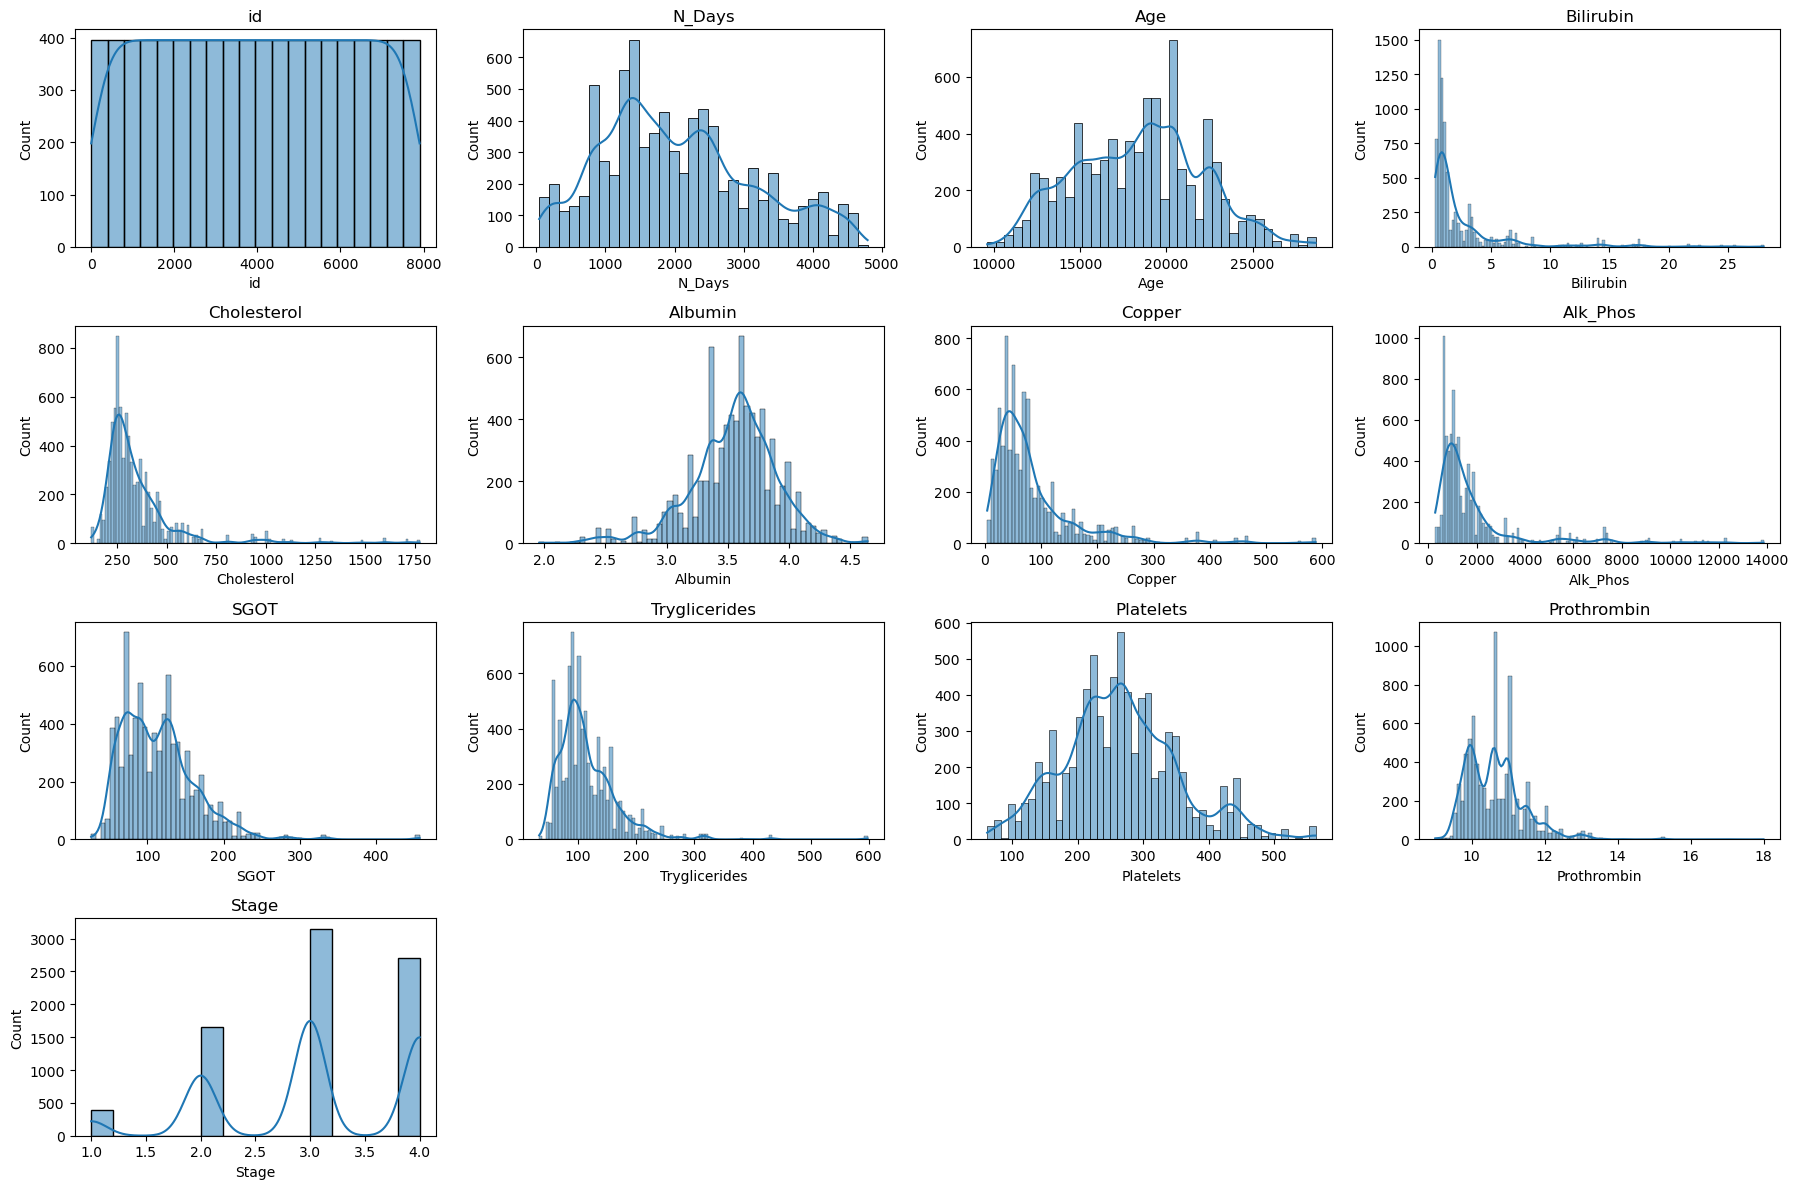

In [23]:
 # looking at data again before cleaning and transformation
    
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
axes = axes.flatten()

# plot each column in a subplot
for i, col in enumerate(df_train.select_dtypes(include=['float64', 'int64']).columns):
    if i < 16:
        sns.histplot(df_train[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col}')
    else:
        break

# remove empty subplots
for j in range(i + 1, 16):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

In [24]:
numerical_df = df_train.select_dtypes(include=['float64', 'int64'])
print("Skewness:\n", numerical_df.skew())

Skewness:
 id               0.000000
N_Days           0.448660
Age              0.084091
Bilirubin        3.339695
Cholesterol      3.679658
Albumin         -0.561150
Copper           2.701736
Alk_Phos         3.195558
SGOT             1.534806
Tryglicerides    2.633921
Platelets        0.420048
Prothrombin      1.292436
Stage           -0.525973
dtype: float64


In [25]:
# converting 'Age' from days to years
df_train['Age'] = df_train['Age'] / 365

# check the data
print(df_train['Age'].head())

0    58.991781
1    52.704110
2    37.608219
3    50.575342
4    45.638356
Name: Age, dtype: float64


In [26]:
# applying log transformation to columns w/ right skew 
# Bilirubin, Cholesterol, Copper, Alk_Phos, SGOT, Triglicerides, Prothrombin

df_train['Bilirubin'] = np.log(df_train['Bilirubin'] + 1)
df_train['Cholesterol'] = np.log(df_train['Cholesterol'] + 1)
df_train['Copper'] = np.log(df_train['Copper'] + 1)
df_train['Alk_Phos'] = np.log(df_train['Alk_Phos'] + 1)
df_train['SGOT'] = np.log(df_train['SGOT'] + 1)
df_train['Tryglicerides'] = np.log(df_train['Tryglicerides'] + 1)
df_train['Prothrombin'] = np.log(df_train['Prothrombin'] + 1)

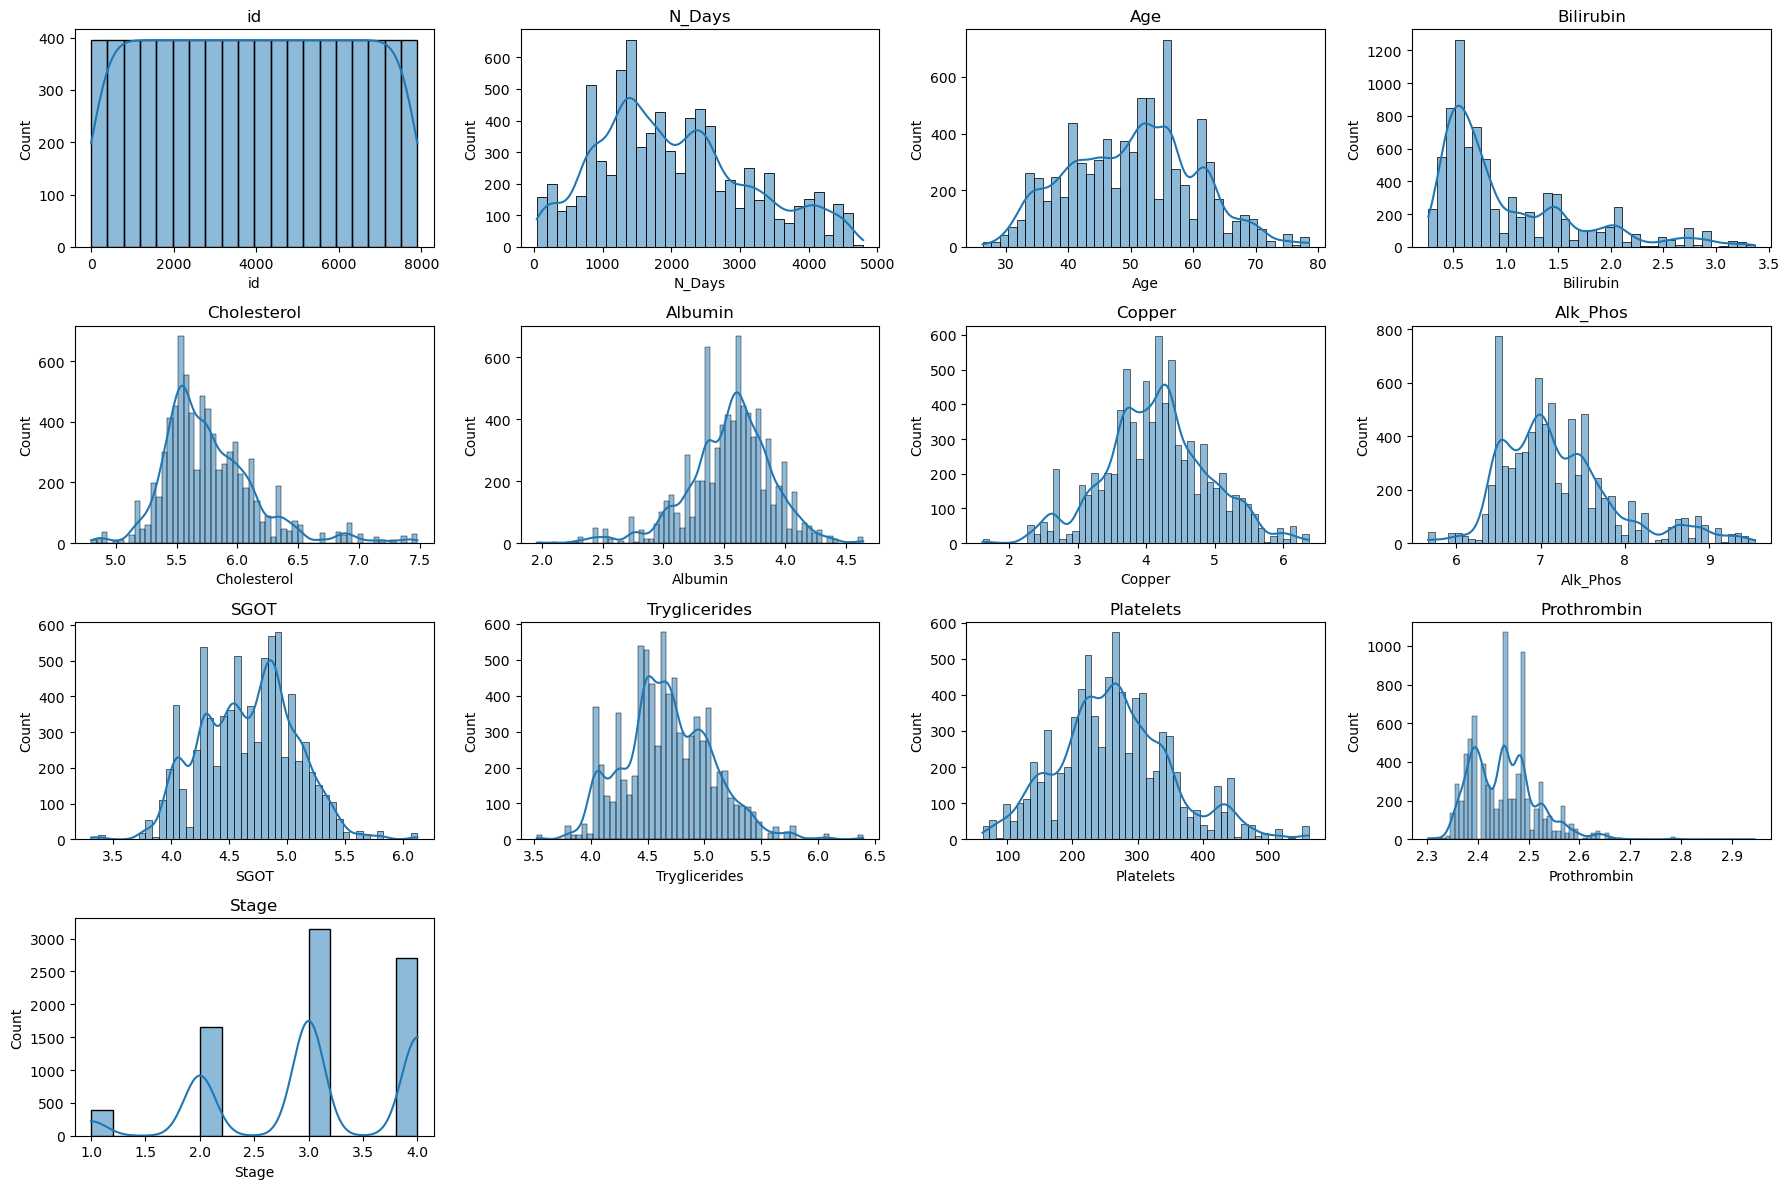

In [27]:
 # looking at data again AFTER cleaning and transformation
    
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
axes = axes.flatten()

# plot each column in a subplot
for i, col in enumerate(df_train.select_dtypes(include=['float64', 'int64']).columns):
    if i < 16:
        sns.histplot(df_train[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col}')
    else:
        break

# remove empty subplots
for j in range(i + 1, 16):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

---
---

## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


In [28]:
# dropping 'id' column 
df_train.drop('id', axis=1, inplace=True)

In [29]:
# check if 'id' column as been removed
df_train.head(10)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,58.991781,M,N,N,N,N,1.193922,5.758902,3.35,5.153292,7.379008,5.197391,4.158883,394.0,2.370244,3.0,D
1,2574,Placebo,52.704110,F,N,N,N,N,0.641854,5.899897,3.54,4.158883,7.273093,4.911551,4.488636,361.0,2.484907,3.0,C
2,3428,Placebo,37.608219,F,N,Y,Y,Y,1.458615,5.703782,3.55,4.882802,6.937314,4.790404,3.931826,199.0,2.541602,4.0,D
3,2576,Placebo,50.575342,F,N,N,N,N,0.470004,5.549076,3.50,4.077537,7.410952,4.280824,4.574711,269.0,2.459589,3.0,C
4,788,Placebo,45.638356,F,N,Y,N,N,0.741937,5.849325,3.65,4.158883,7.074963,4.840637,4.574711,298.0,2.451005,4.0,C
5,703,D-penicillamine,52.794521,F,N,Y,N,N,0.470004,5.429346,3.46,3.555348,8.772951,4.121149,4.234107,213.0,2.525729,3.0,D
6,1300,Placebo,48.501370,F,N,N,N,N,0.693147,5.796058,3.35,3.784190,7.425358,4.934114,4.510860,291.0,2.379546,3.0,C
7,1615,Placebo,58.304110,F,N,Y,N,N,0.470004,5.613128,3.94,3.610918,6.395262,3.983413,5.370638,227.0,2.388763,3.0,C
8,2050,D-penicillamine,56.668493,F,N,N,N,N,0.530628,5.888878,3.65,4.290459,8.069968,4.559650,5.043425,269.0,2.379546,2.0,C
9,2615,D-penicillamine,41.120548,F,N,N,N,N,0.641854,6.171701,3.60,3.688879,7.472501,5.147494,4.948760,234.0,2.451005,2.0,C


In [30]:
# more libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [38]:
# splitting the dataset 
X = df_train.drop(columns=['Status'], axis=1)
y = df_train['Status']

In [39]:
# encode the target (Status)
target_encoded = LabelEncoder()
y = target_encoded.fit_transform(y)

In [40]:
# now also encode all categorical cols 
# Sex, Ascites , Hepatomegaly, Spiders, Edema, Drug
cat_cols = ['Sex', 'Ascites' , 'Hepatomegaly', 'Spiders', 'Edema', 'Drug']

# dictionary to hold LabelEncoders for ea. column
label_encoders = {}

# encode training data & make label encoders
for column in cat_cols:
    encoder = LabelEncoder()
    label_encoders[column] = encoder
    
    # transform & fit data
    df_train[column] = encoder.fit_transform(df_train[column])
    
    # transform & fit data
    df_test[column] = encoder.fit_transform(df_test[column])

In [41]:
df_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,0,58.991781,1,0,0,0,0,1.193922,5.758902,3.35,5.153292,7.379008,5.197391,4.158883,394.0,2.370244,3.0,D
1,2574,1,52.704110,0,0,0,0,0,0.641854,5.899897,3.54,4.158883,7.273093,4.911551,4.488636,361.0,2.484907,3.0,C
2,3428,1,37.608219,0,0,1,1,2,1.458615,5.703782,3.55,4.882802,6.937314,4.790404,3.931826,199.0,2.541602,4.0,D
3,2576,1,50.575342,0,0,0,0,0,0.470004,5.549076,3.50,4.077537,7.410952,4.280824,4.574711,269.0,2.459589,3.0,C
4,788,1,45.638356,0,0,1,0,0,0.741937,5.849325,3.65,4.158883,7.074963,4.840637,4.574711,298.0,2.451005,4.0,C


### Random Forest 

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, classification_report

In [43]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
rf.fit(X_train, y_train)

# predictions
rf_preds = rf.predict(X_test)

# probabilities
rf_probs = rf.predict_proba(X_test)

# log loss & classification report
print("Random Forest Metrics")
print("\nLog Loss:", log_loss(y_test, rf_probs))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Metrics

Log Loss: 0.52210866279418
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       966
           1       0.73      0.15      0.25        52
           2       0.84      0.73      0.78       563

    accuracy                           0.83      1581
   macro avg       0.80      0.60      0.64      1581
weighted avg       0.83      0.83      0.82      1581



---
---

### XGBoost

In [45]:
from xgboost import XGBClassifier

In [46]:
# XG Boost model
# XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, random_state=42)

# train the model
xgb.fit(X_train, y_train)

# predictions
xgb_preds = xgb.predict(X_test)

# probabilities
xgb_probs = xgb.predict_proba(X_test)

# log loss & classification report
print("XGBoost Metrics")
print("\nLog Loss:", log_loss(y_test, xgb_probs))
print("Classification Report:\n", classification_report(y_test, xgb_preds))

XGBoost Metrics

Log Loss: 0.5148158563112661
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       966
           1       0.59      0.19      0.29        52
           2       0.83      0.74      0.78       563

    accuracy                           0.83      1581
   macro avg       0.75      0.62      0.65      1581
weighted avg       0.82      0.83      0.82      1581



---
---
## Apply to Test & Sumission
    - will be applying xgb to submission as it did better than random forest

In [47]:
test_ids = df_test['id']

# process the test data
df_test_processed = pd.get_dummies(df_test.drop(['id'], axis=1))

In [48]:
# setting class names to required output names for challenge
class_map = {0: 'Status_C', 1: 'Status_D', 2: 'Status_CL'}

xgb_probs_test = xgb.predict_proba(df_test_processed)

# make df w/ the class names 
submission_columns = [class_map[i] for i in range(len(xgb.classes_))]
submission = pd.DataFrame(xgb_probs_test, columns=submission_columns)

# adding 'id' col
submission['id'] = test_ids

# add 'id' col to submission 
submission = submission[['id'] + submission_columns]
submission.to_csv('cirrhosis_submission.csv', index=False)